In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
import missingno

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df_rename = {
  'Pregnancies': 'pregnancies',
  'Glucose': 'glucose',
  'BloodPressure': 'blood_pressure',
  'SkinThickness': 'skin_thickness',
  'Insulin': 'insulin',
  'BMI': 'bmi',
  'DiabetesPedigreeFunction': 'pedigree_function',
  'Age': 'age',
  'Outcome': 'outcome'
}
df.rename(columns=df_rename, inplace=True)
df.head()

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   pedigree_function  age  outcome  
0              0.627   50        1  
1              0.351   31        0  
2              0.672   32        1  
3              0.167   21        0  
4              2.288   33        1

In [5]:
df.describe()

pregnancies     glucose  blood_pressure  skin_thickness     insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              bmi  pedigree_function         age     outcome  
count  768.000000         768.000000  768.000000  768.000000  
mean    31.992578           0.471876   33.240885    0.348958  
std      7.884160           0.331329   11.760232    0.476951  
min      0.000000           0.078000   21.000000    0.000000  
25%     27.300000           0.243750   24.000000    0.000000  
50%     32.000000           0.372500   29.000000    0.000000  
75%     36.600000           0.626250   41.000000    1.000000  
max     67.100000           2.420000   81.000000    1.000000

<AxesSubplot: >

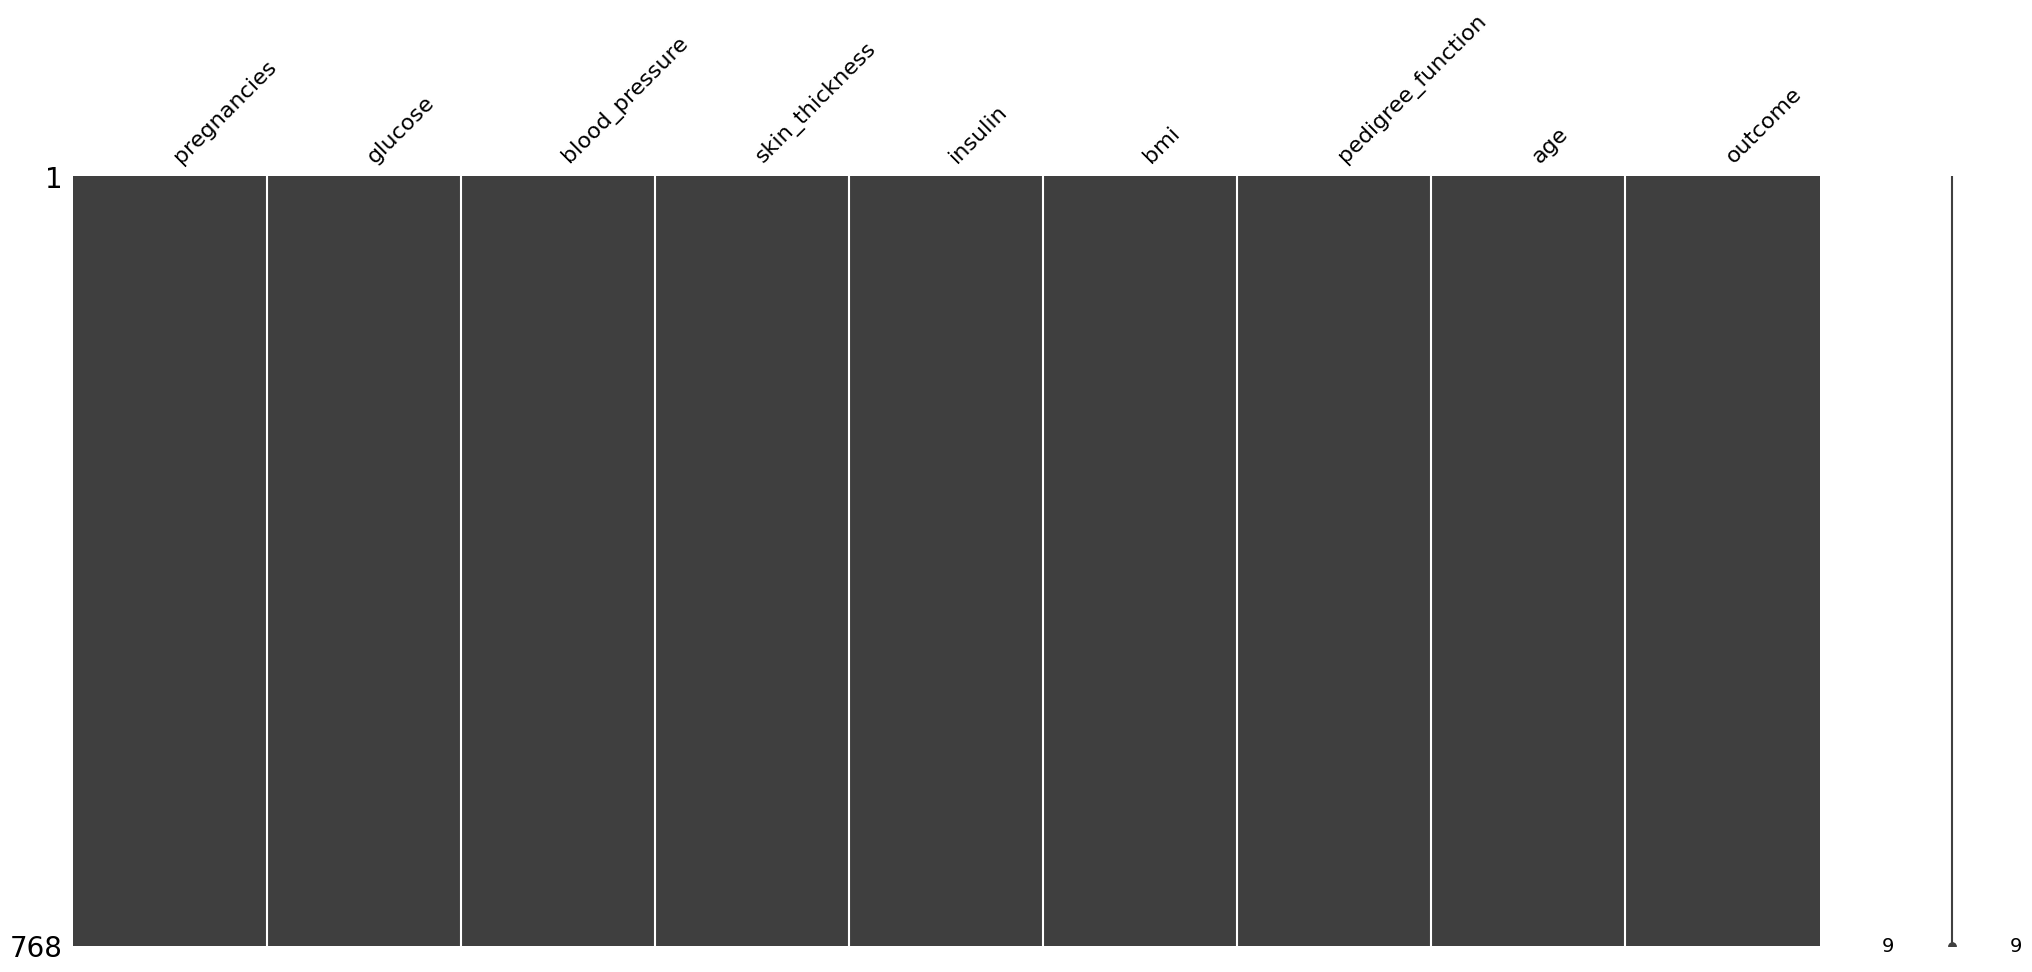

In [7]:
missingno.matrix(df)

In [18]:
colors = ['blue', 'red']
labels = ['0', '1']
values = df['outcome'].value_counts() / df['outcome'].shape[0]

print(values)
# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# fig.update_traces(textinfo='percent', textfont_size=24, marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# fig.update_layout()
# fig.show()

0    0.651042
1    0.348958
Name: outcome, dtype: float64


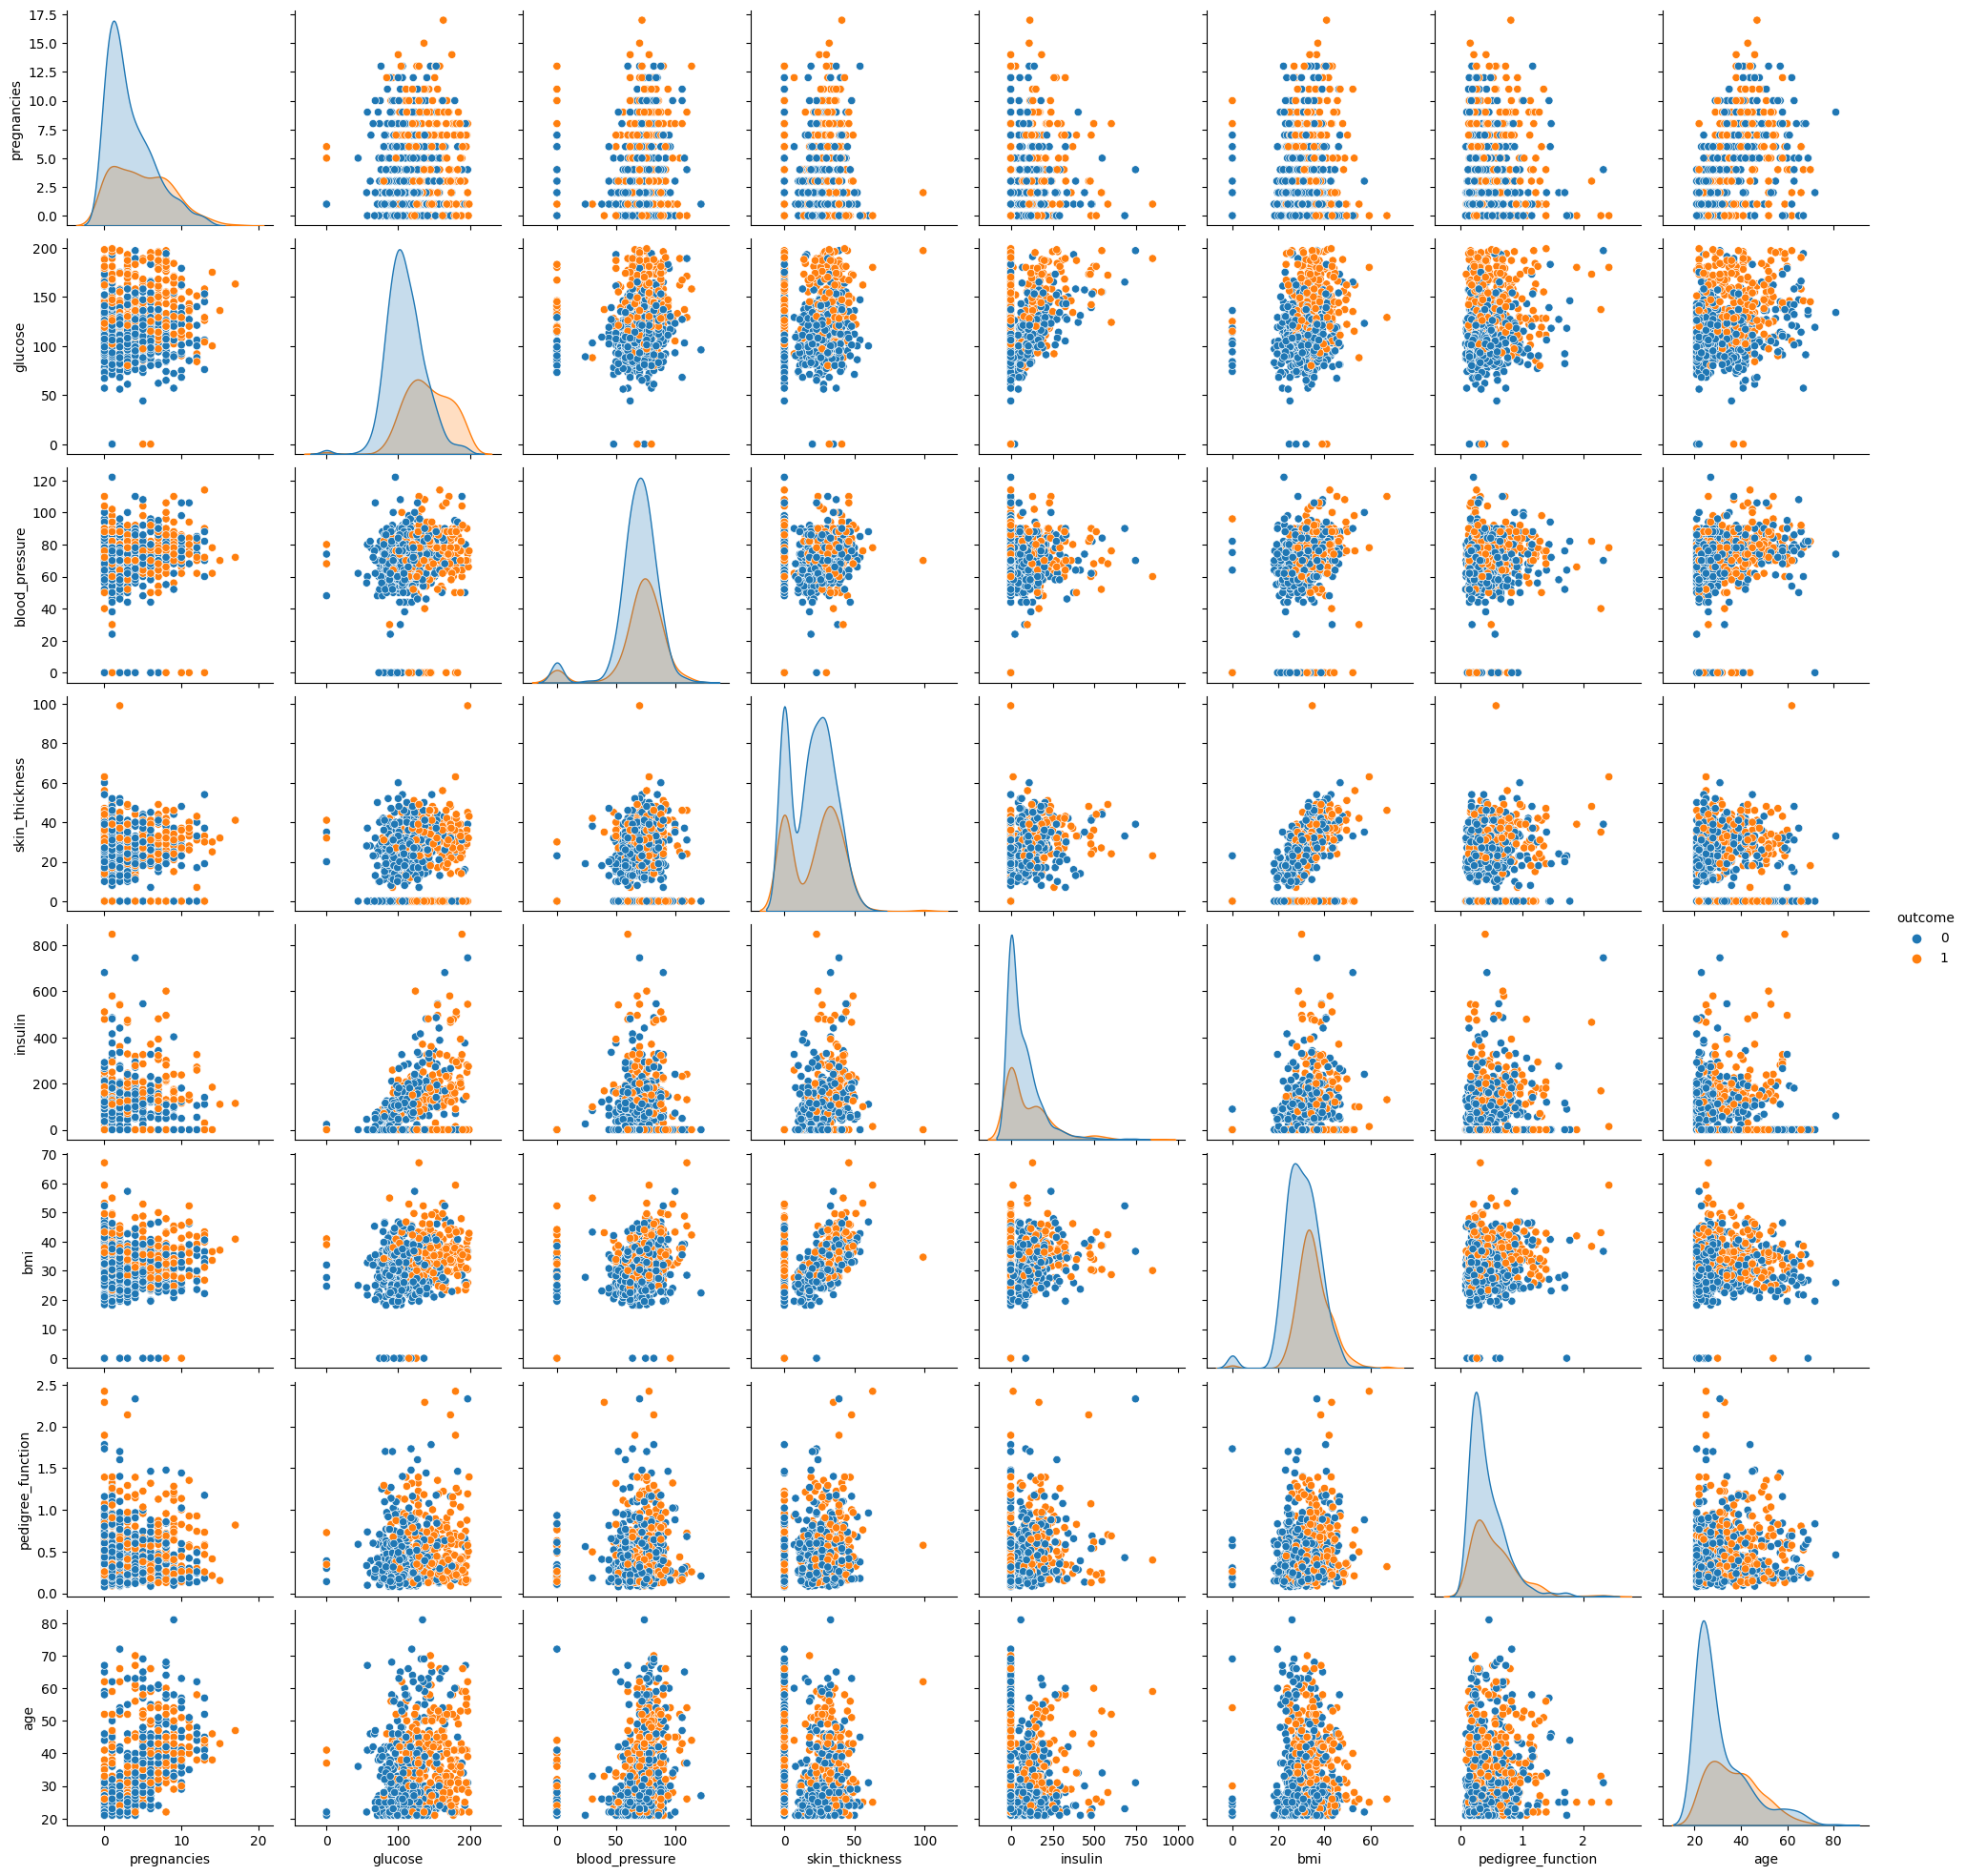

In [19]:
sns.pairplot(df, hue="outcome")

In [20]:
fnames = [col for col in df.loc[:,:'age'].columns]
print(fnames)

['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'pedigree_function', 'age']


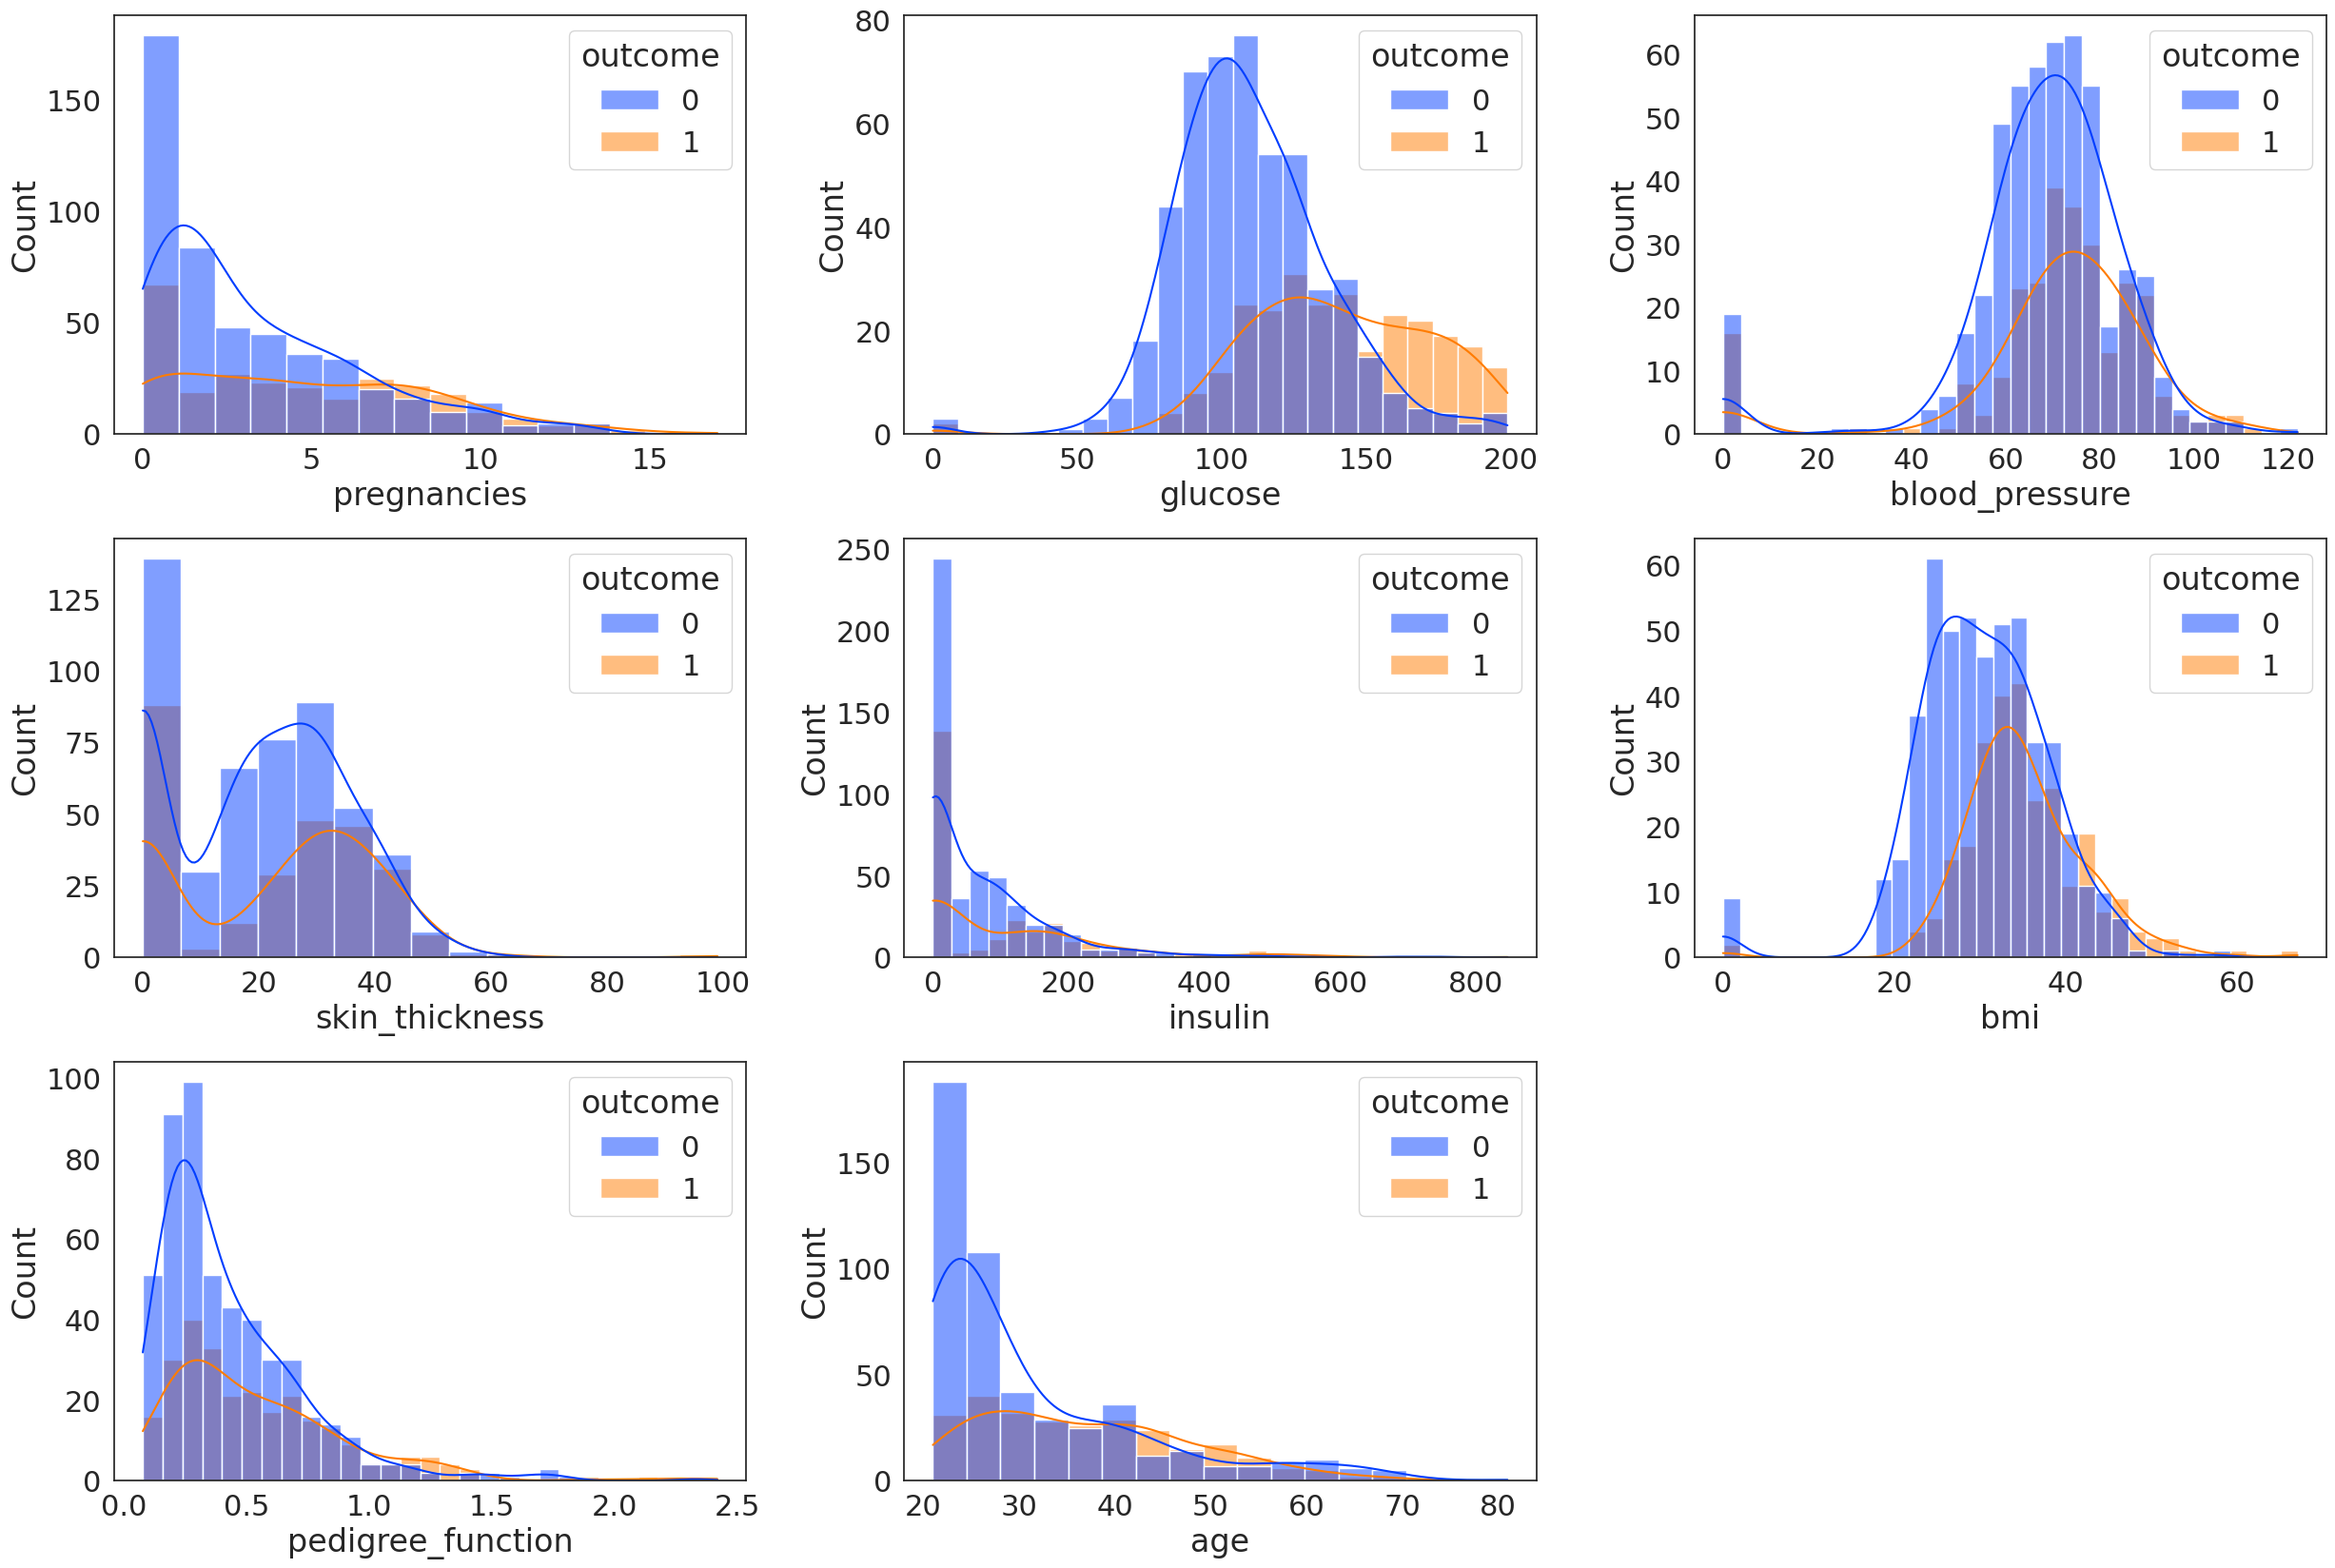

In [34]:
mpl.rcParams['figure.figsize'] = 30, 20
sns.set(font_scale=2)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.25, wspace=0.25)
i = 1
for fname in fnames:
  plt.subplot(3,3,i)
  sns.histplot(data=df, x=fname, hue='outcome',kde=True)
  i = i + 1

In [35]:
fzeros = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
db_mean = df[fzeros].mean()
df[fzeros] = df[fzeros].replace(0, db_mean)



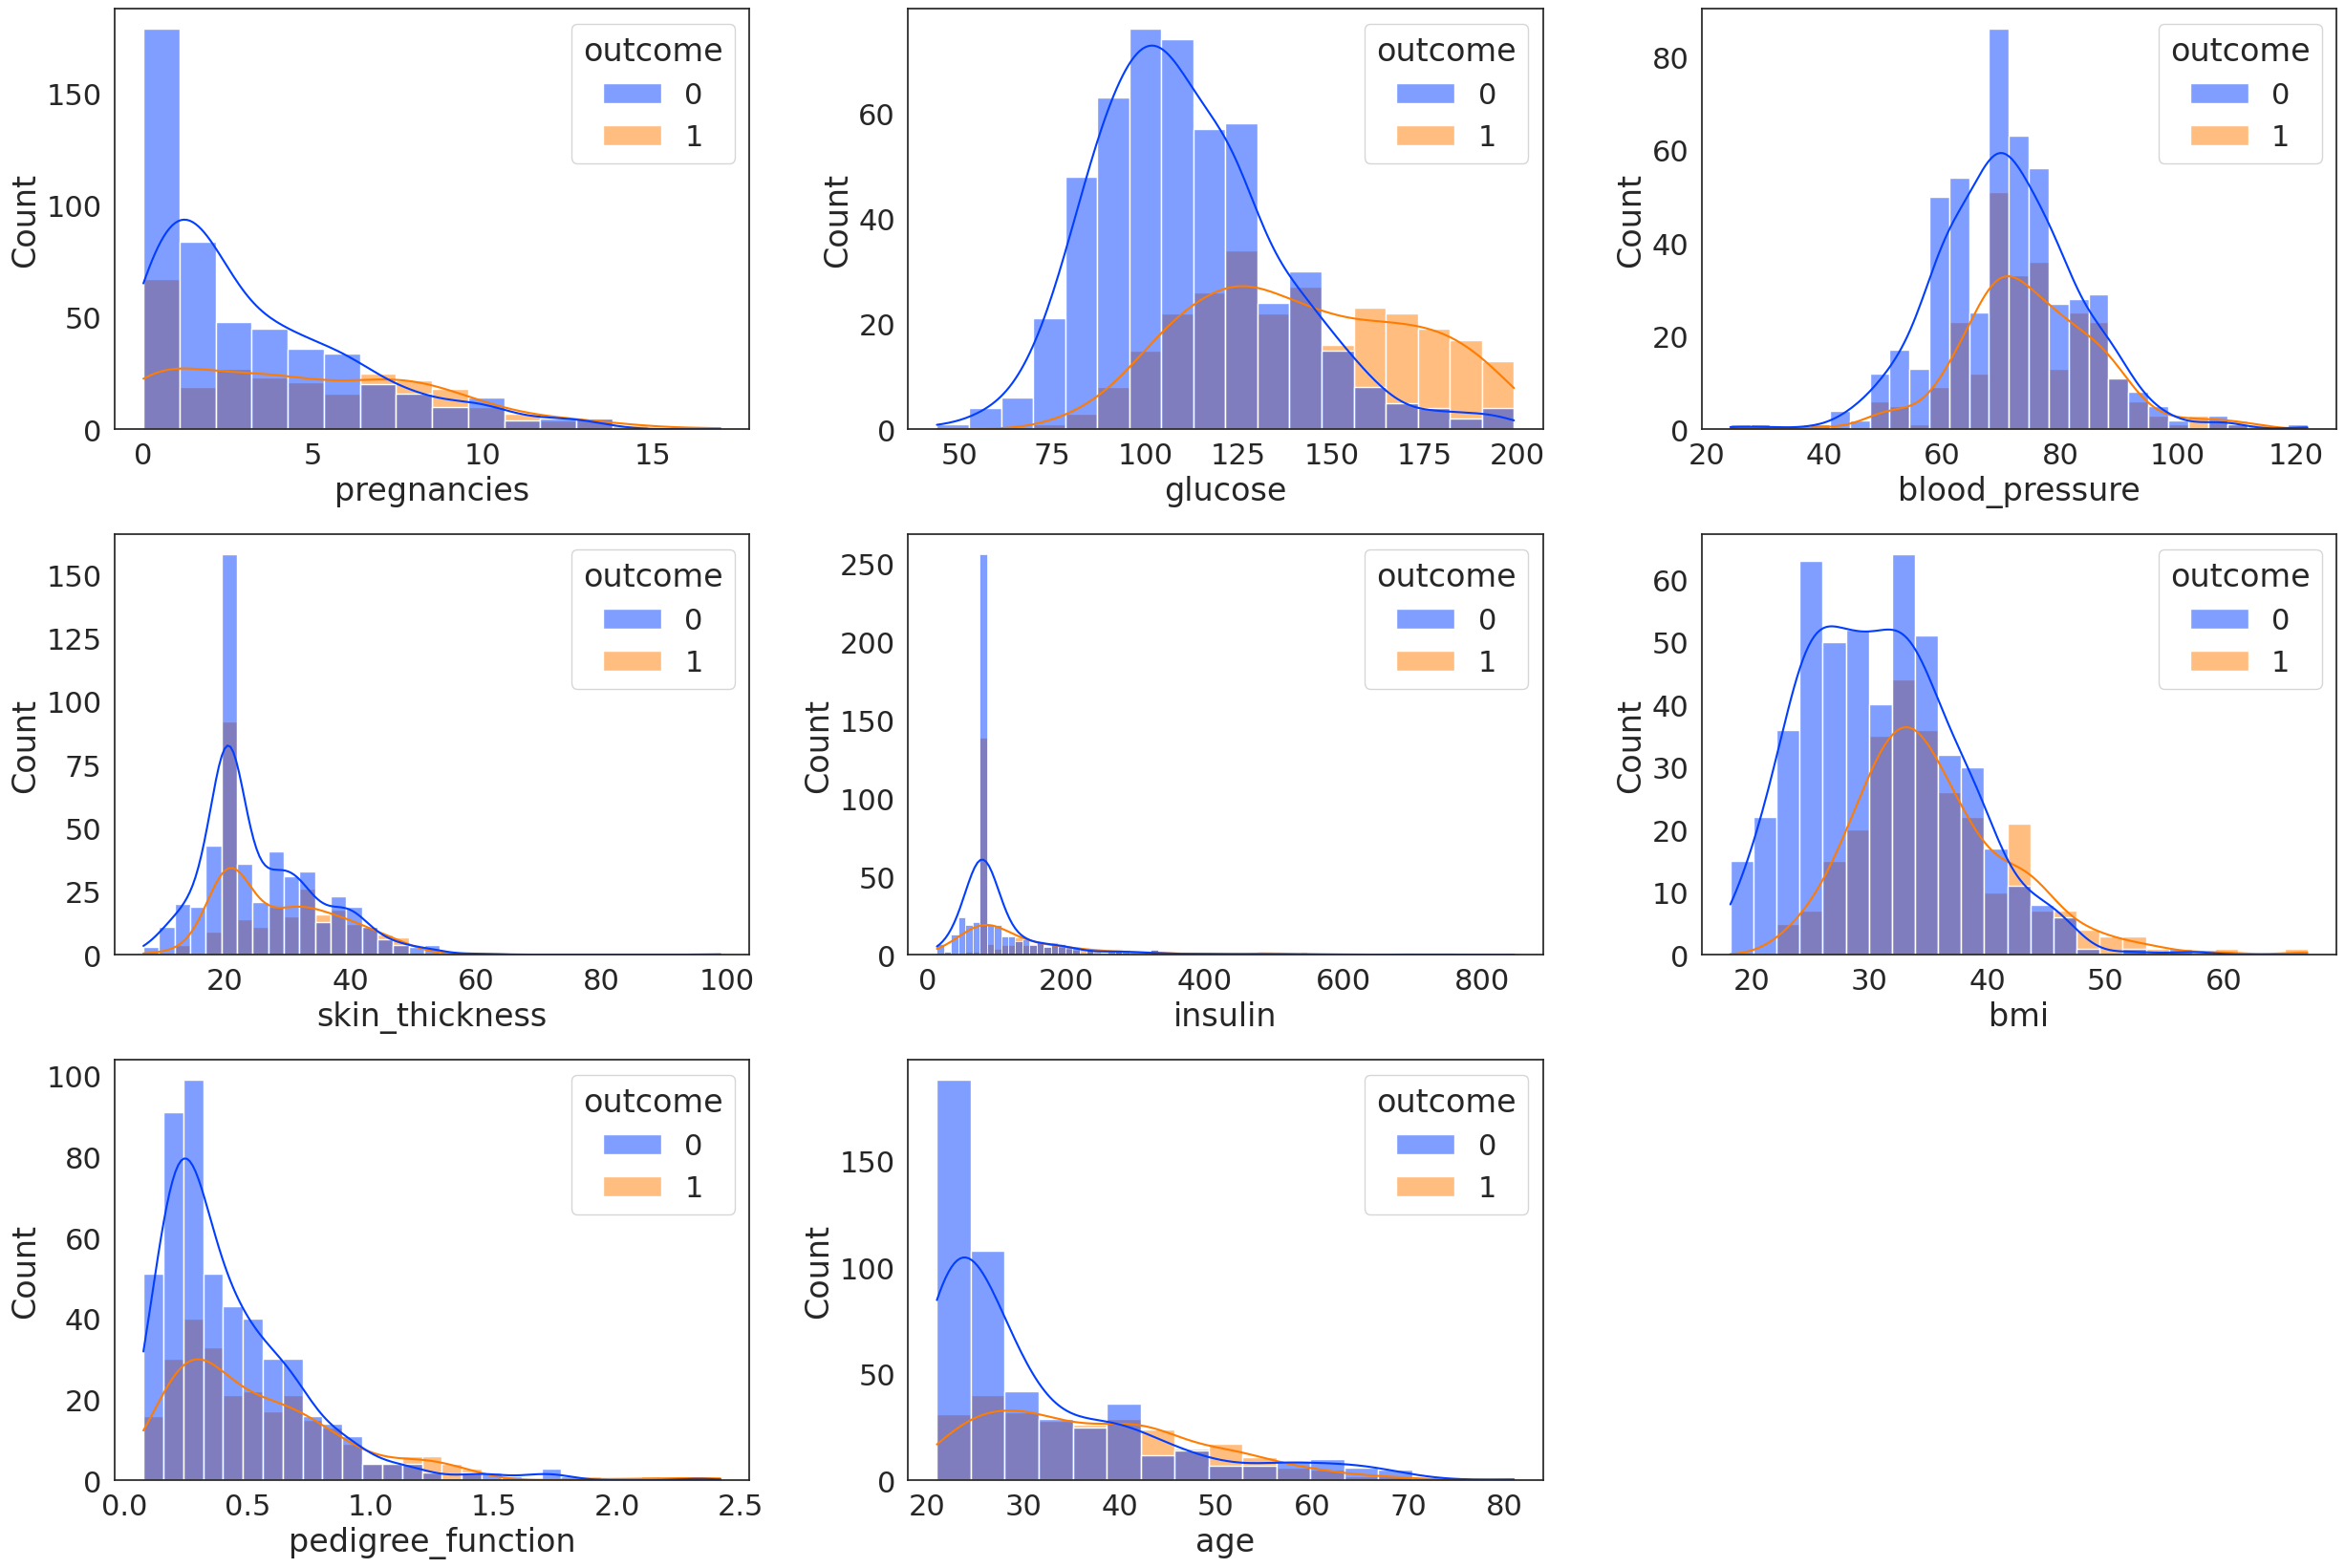

In [36]:
mpl.rcParams['figure.figsize'] = 30, 20
sns.set(font_scale=2)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.25, wspace=0.25)
i = 1
for fname in fnames:
  plt.subplot(3,3,i)
  sns.histplot(data=df, x=fname, hue='outcome',kde=True)
  i = i + 1

Text(0, 0.5, 'correlation')

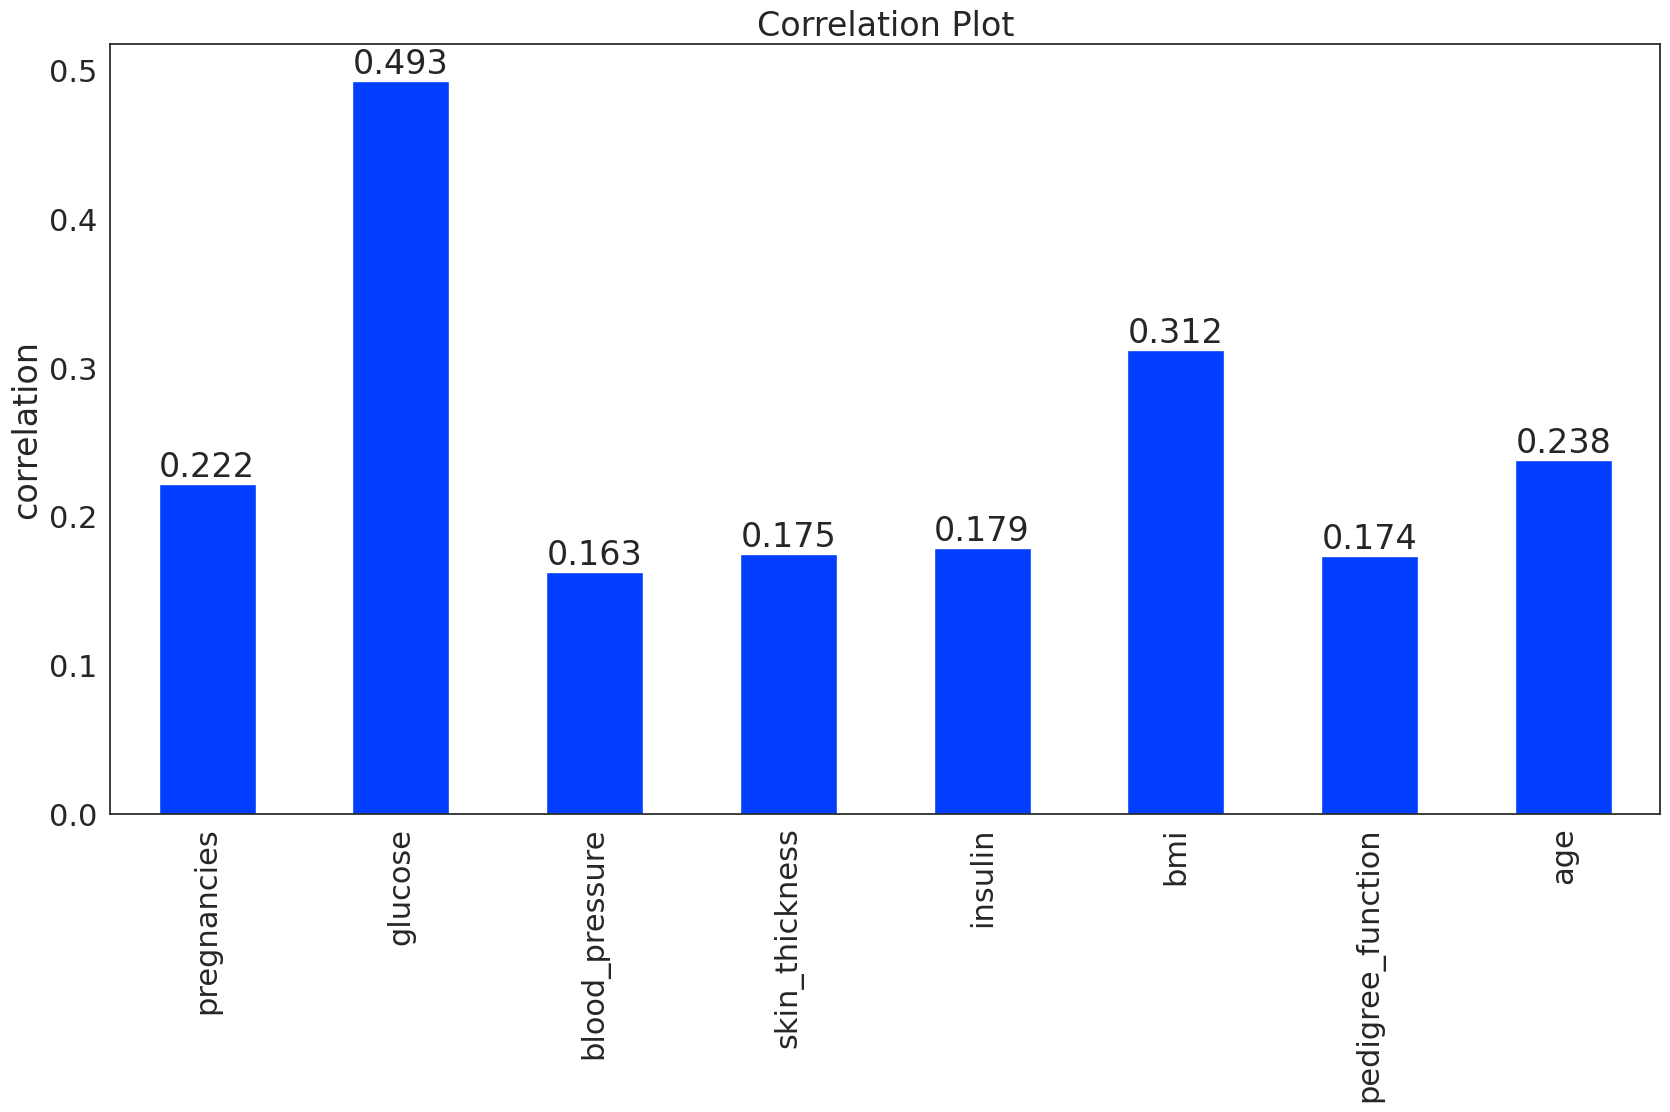

In [53]:
plt.figure(figsize=(20,10))
df_corr = df.corr()['outcome'].drop('outcome')
ax = df_corr.plot(kind='bar',title='Correlation Plot')
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_ylabel('correlation')



In [70]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 

In [65]:
corr_cols = [
  'glucose', 'bmi', 'age', 'pregnancies','insulin', 
  'skin_thickness', 'pedigree_function', 'blood_pressure'
]

X = [df[corr_cols[:(x+1)]] for x in range(len(corr_cols))]
y = df['outcome']

X_train = []
X_test = []
y_train = []
y_test = []
for x in X:
  a, b, c, d = train_test_split(x, y, test_size=0.2, random_state=40)
  X_train.append(a)
  X_test.append(b)
  y_train.append(c)
  y_test.append(d)


In [105]:
col_names = [] + [str(x) for x in range(1, len(corr_cols)+1)]
training_df = pd.DataFrame([], columns=col_names)
testing_df = pd.DataFrame([], columns=col_names)

print(training_df)

models = [LogisticRegression, LinearSVC, DecisionTreeClassifier, MLPClassifier]
trained_models = []

for Model in models:
  training_row = []
  testing_row = []

  print(f'Doing {Model.__name__}')

  for n in range(len(corr_cols)):
    print(f'First {n} attributes')

    m = Model(random_state=40)
    trained_models.append(m.fit(X_train[n], y_train[n]))
    training_row.append(m.score(X_train[n], y_train[n]))
    testing_row.append(m.score(X_test[n], y_test[n]))

  print(training_row)

  training_df.loc[Model.__name__] = training_row
  testing_df.loc[Model.__name__] = testing_row


Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8]
Index: []
Doing LogisticRegression
First 0 attributes
First 1 attributes
First 2 attributes
First 3 attributes
First 4 attributes
First 5 attributes
First 6 attributes
First 7 attributes
[0.744299674267101, 0.752442996742671, 0.7638436482084691, 0.7703583061889251, 0.7752442996742671, 0.7719869706840391, 0.7785016286644951, 0.7703583061889251]
Doing LinearSVC
First 0 attributes
First 1 attributes
First 2 attributes
First 3 attributes
First 4 attributes
First 5 attributes
First 6 attributes
First 7 attributes
[0.7296416938110749, 0.6596091205211726, 0.6596091205211726, 0.757328990228013, 0.6693811074918566, 0.6807817589576547, 0.6775244299674267, 0.6807817589576547]
Doing DecisionTreeClassifier
First 0 attributes
First 1 attributes
First 2 attributes
First 3 attributes
First 4 attributes
First 5 attributes
First 6 attributes
First 7 attributes
[0.7719869706840391, 0.993485342019544, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Doing MLPClassifier
First

<AxesSubplot: title={'center': 'Testing plot'}>

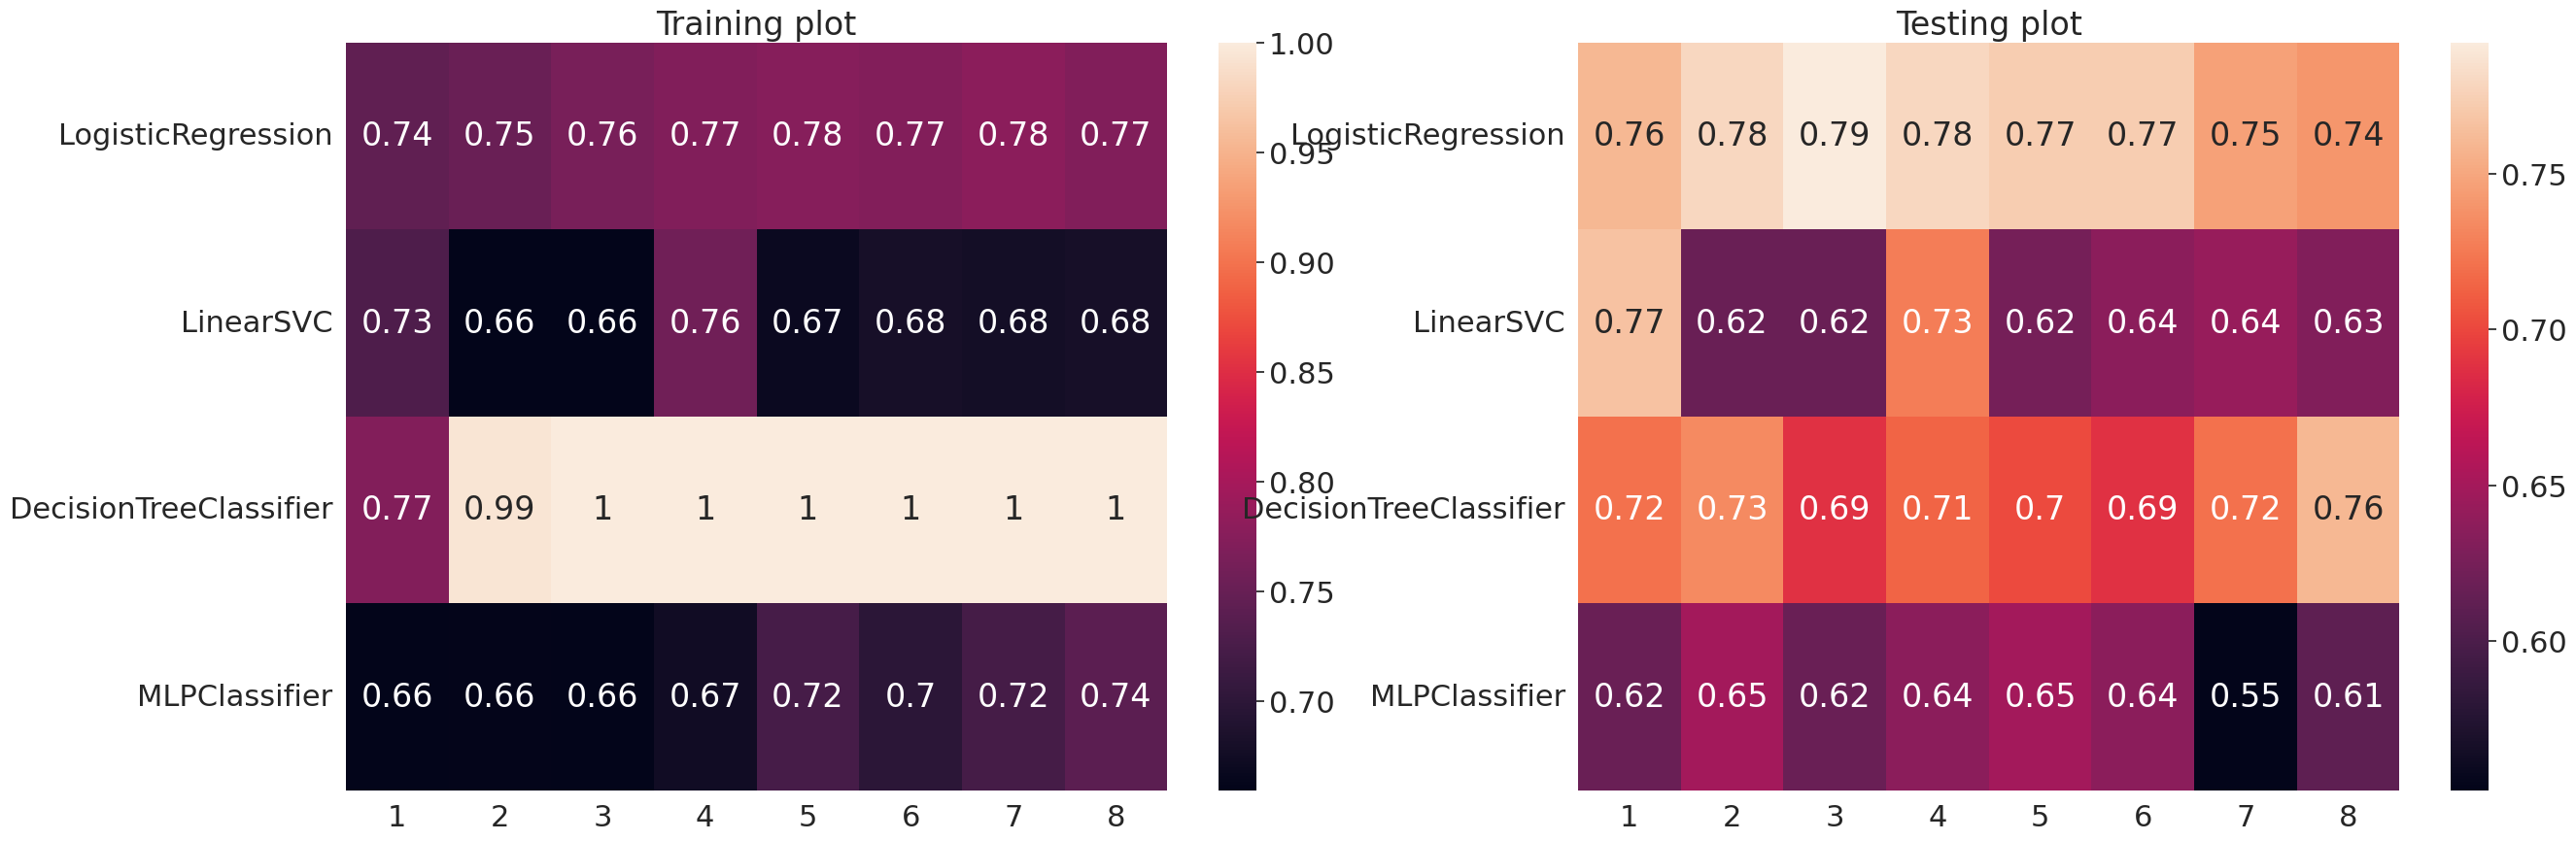

In [90]:
plt.figure(figsize=(30,10))
plt.subplot(121,title = 'Training plot')
sns.heatmap(training_df,annot=True)

plt.subplot(122,title = 'Testing plot')
sns.heatmap(testing_df,annot=True)

In [92]:
automl_models = []

In [99]:
for n in range(len(corr_cols)):
  print(automl_models)
  print(f'First {n} attributes')

  AutoML = tpot.TPOTClassifier(
    generations=5, 
    population_size=20, 
    cv=5,
    random_state=42, 
    verbosity=2
  )

  automl_models.append(AutoML.fit(X_train[n], y_train[n]))

[TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2), TPOTClassifier(generations=5, n_jobs=8, verbosity=2)]
First 0 attributes
                                                                             
Generation 1 - Current best internal CV score: 0.7475409836065574
                                                                             
Generation 2 - Current best internal CV score: 0.7475409836065574
                                                                             
Generation 3 - Current best internal CV score: 0.7475409836065574
                                                                             
Generation 4 - Current best internal C

In [107]:
training_row = []
testing_row = []

for n in range(len(corr_cols)):
  print(f'First {n} attributes')
  training_row.append(automl_models[n].score(X_train[n], y_train[n]))
  testing_row.append(automl_models[n].score(X_test[n], y_test[n]))

training_df.loc['TPOT'] = training_row
testing_df.loc['TPOT'] = testing_row

First 0 attributes
First 1 attributes
First 2 attributes
First 3 attributes
First 4 attributes
First 5 attributes
First 6 attributes
First 7 attributes


<AxesSubplot: title={'center': 'Testing plot'}>

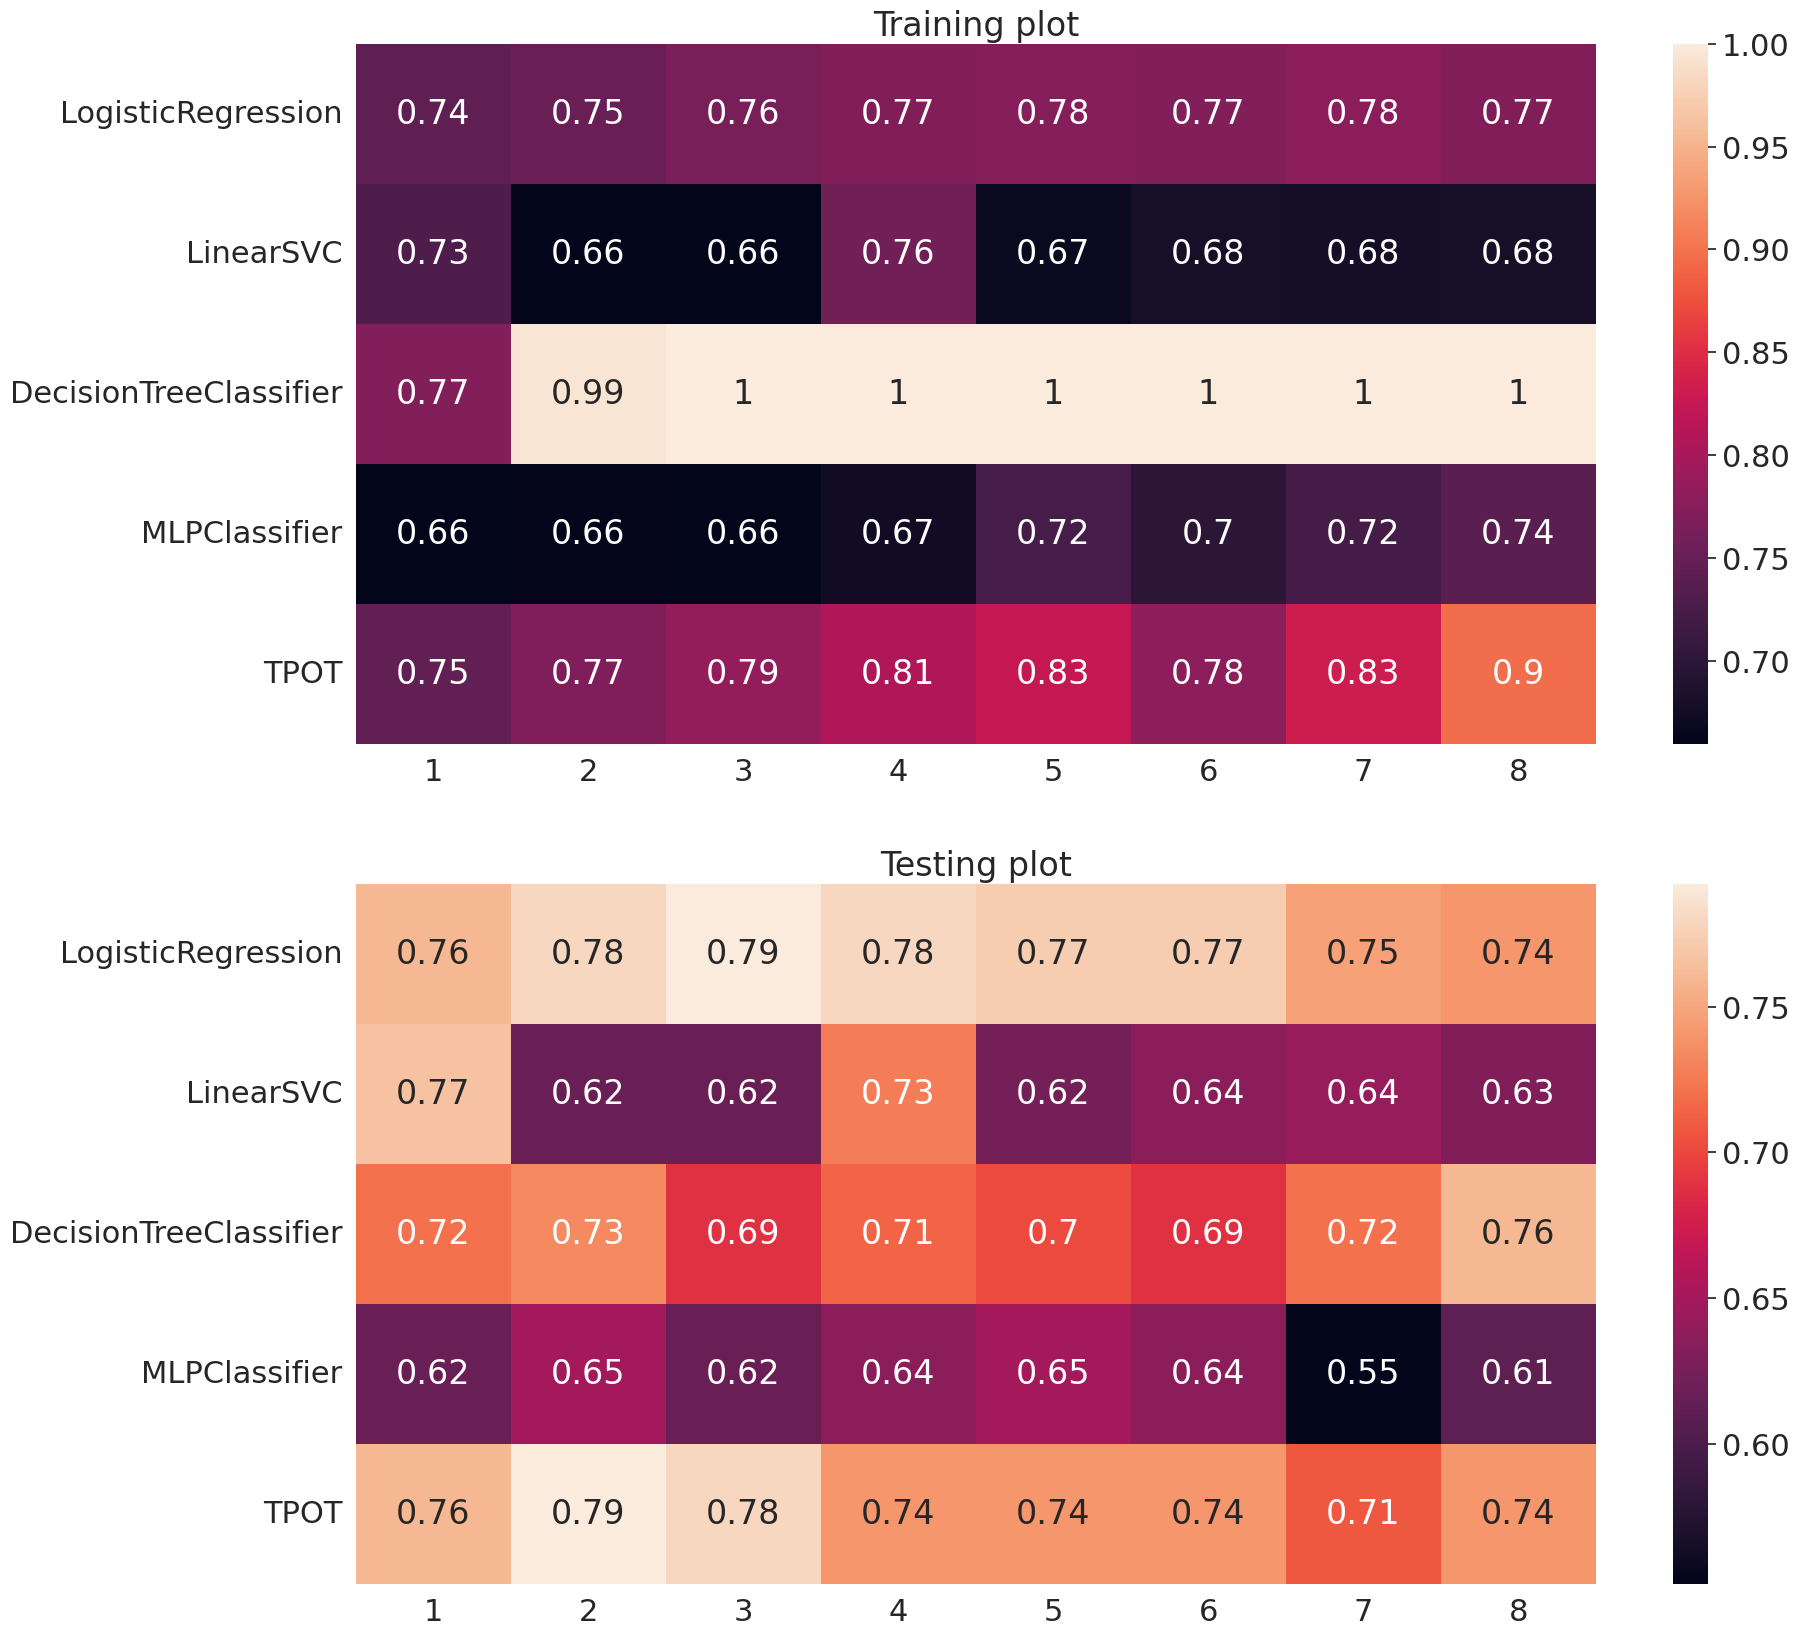

In [111]:
plt.figure(figsize=(20,20))
plt.subplot(211,title = 'Training plot')
sns.heatmap(training_df,annot=True)

plt.subplot(212,title = 'Testing plot')
sns.heatmap(testing_df,annot=True)

In [113]:
automl_dict = {}

for gens in [5, 10, 15, 20]:
  for pop in [20, 40, 60, 80]:
    AutoML = tpot.TPOTClassifier(
      generations=gens, 
      population_size=pop, 
      cv=5,
      random_state=42, 
      verbosity=2
    )

    automl_dict[(gens, pop)] = AutoML.fit(X_train[7], y_train[7])

                                                                             
Generation 1 - Current best internal CV score: 0.7785419165667067
                                                                             
Generation 2 - Current best internal CV score: 0.7785419165667067
                                                                             
Generation 3 - Current best internal CV score: 0.7785419165667067
                                                                              
Generation 4 - Current best internal CV score: 0.7817939490870318
                                                                              
Generation 5 - Current best internal CV score: 0.7817939490870318
                                                                              
Best pipeline: XGBClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=7, min_samples_split=9, n_estimators=100), learnin

In [115]:
tpot_cols = [5, 10, 15, 20]
tpot_rows = [20, 40, 60, 80]

tpot_training_df = pd.DataFrame([], columns=tpot_cols)

for r in tpot_rows:
  tpot_training_df[r] = [automl_dict[(c, r)].score(X_train[n], y_train[n]) for c in tpot_cols]

print(tpot_training_df)
# tpot_testing_df = pd.DataFrame([], columns=tpot_cols)



KeyError: (40, 20)